# Mall Customer Cluster Analysis
- dataset from: https://www.kaggle.com/nafisur/customer-segmentation-analysis-cluster-analysis
- "When ever a customer applied for a membership for a Mall Customer. They need to fill the membership form, from which we can get the details like Name, Age, Gender, Annual Income etc. and based on how many times a customer visit the store and how much they spend, I am computing a spending score between 1-100 for each customer".

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.patches as mpatches

from sklearn.cluster import KMeans

## Load data

In [2]:
filepath = ''
data = pd.read_csv(filepath + 'Mall_Customers.csv')

In [3]:
print('Shape of data:', data.shape)
data.head()

Shape of data: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Visualize data

In [5]:
x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']

Text(0.5,1,'Spending Score vs. Annual Income')

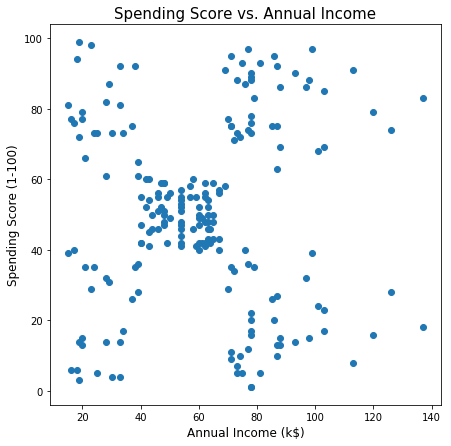

In [6]:
fig, ax1 = plt.subplots(figsize=(7,7))

ax1.scatter(x, y)
ax1.set_xlabel('Annual Income (k$)', fontsize=12)
ax1.set_ylabel('Spending Score (1-100)', fontsize=12)
ax1.set_title('Spending Score vs. Annual Income', fontsize=15)

- It seems that the data can be clustered into 5 groups

## Transform data

In [34]:
def group_xy(col1, col2):
    '''
    Groups integers xn, yn from two columns into the form: [[x1, y1], [x2, y2]...[xn, yn]]. A form suitable for K-means.
    '''
    data_trans = []
    
    for i in range(len(col1)):
        data_trans.append([ col1.iloc[i], col2.iloc[i] ])
    
    return data_trans

In [8]:
col1 = data['Annual Income (k$)']
col2 = data['Spending Score (1-100)']

data_trans = group_xy(col1, col2)
data_trans[:10]

[[15, 39],
 [15, 81],
 [16, 6],
 [16, 77],
 [17, 40],
 [17, 76],
 [18, 6],
 [18, 94],
 [19, 3],
 [19, 72]]

## Use k-means clustering
- k=5
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [9]:
# Initialize kmeans and fit data
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data_trans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [24]:
# Cluster centroids
centroids = kmeans.cluster_centers_
print('Centroid coordinates:\n', centroids)

# Computes labels
labels = kmeans.labels_
print('\nCentroid assignment for all 200 data points:\n', labels)

Centroid coordinates:
 [[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]

Centroid assignment for all 200 data points:
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [11]:
centroids

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

## Extract centroid coordinate info
- for plotting purposes

In [12]:
# Using list comprehension.
#Thanks to: https://stackoverflow.com/questions/25050311/extract-first-item-of-each-sublist-in-python
centroids_x = [item[0] for item in centroids]
centroids_y = [item[1] for item in centroids]

## Visualize predictions

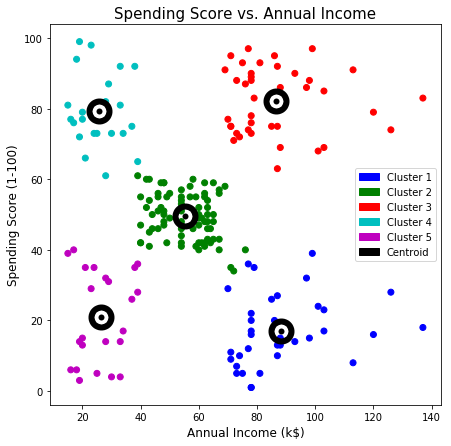

In [31]:
color_theme = np.asarray(['b', 'g', 'r', 'c', 'm'])

fig, ax1 = plt.subplots(figsize=(7,7))

# relabel = np.choose(labels, [0,1,2,3,4]) can remap predictions to different colors, use relabel instead of label

ax1.scatter(x, y, c=color_theme[labels])
ax1.scatter(centroids_x, centroids_y, color='black', lw=20)
ax1.set_xlabel('Annual Income (k$)', fontsize=12)
ax1.set_ylabel('Spending Score (1-100)', fontsize=12)
ax1.set_title('Spending Score vs. Annual Income', fontsize=15)

# legend using patches
b_patch = mpatches.Patch(color='b', label='Cluster 1')
g_patch = mpatches.Patch(color='g', label='Cluster 2')
r_patch = mpatches.Patch(color='r', label='Cluster 3')
c_patch = mpatches.Patch(color='c', label='Cluster 4')
m_patch = mpatches.Patch(color='m', label='Cluster 5')
blk_patch = mpatches.Patch(color='black', label='Centroid')

patches = [b_patch, g_patch, r_patch, c_patch, m_patch, blk_patch]
plt.legend(handles=patches)

## Analysis
- Unsupervised approach (no prior knowledge of cluster labels).
- Points far from the centroids are harder to classify. That is where the algorithm can shine.

    The K-means algorithm was able to sufficiently group all 200 people into five clusters that reflect the spending habits and annual income for each cluster. Specific marketing strategies can then be tailored for each group to help give customers what they would like to buy.

Nafisur Rahman from Softweb Solutions Inc. suggests to use the following labels for the clusters:
- The cluster with high Monthly income and high Spending score can be called as Target group 
- The cluster with high income but low spending score can be called as Careful group
- The cluster with low income and high spending score can be called as Careless group
- The cluster with low income and low spending score can be called as Sensible group 
- The middcle cluster is the Standard group.
- https://www.kaggle.com/nafisur/customer-segmentation-analysis-cluster-analysis

## Updated visualization

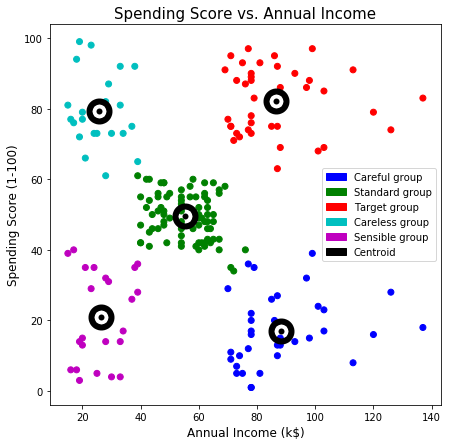

In [33]:
color_theme = np.asarray(['b', 'g', 'r', 'c', 'm'])

fig, ax1 = plt.subplots(figsize=(7,7))

# relabel = np.choose(labels, [0,1,2,3,4]) can remap predictions to different colors, use relabel instead of label

ax1.scatter(x, y, c=color_theme[labels])
ax1.scatter(centroids_x, centroids_y, color='black', lw=20)
ax1.set_xlabel('Annual Income (k$)', fontsize=12)
ax1.set_ylabel('Spending Score (1-100)', fontsize=12)
ax1.set_title('Spending Score vs. Annual Income', fontsize=15)

# legend using patches
b_patch = mpatches.Patch(color='b', label='Careful group')
g_patch = mpatches.Patch(color='g', label='Standard group')
r_patch = mpatches.Patch(color='r', label='Target group')
c_patch = mpatches.Patch(color='c', label='Careless group')
m_patch = mpatches.Patch(color='m', label='Sensible group')
blk_patch = mpatches.Patch(color='black', label='Centroid')

patches = [b_patch, g_patch, r_patch, c_patch, m_patch, blk_patch]
plt.legend(handles=patches)